In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
file_path = ("tripadvisor_review.csv")
df = pd.read_csv(file_path)
df.head()

,User ID,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
0,User 1,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,User 2,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,User 3,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,User 4,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,User 5,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54


In [3]:
features = ['Art Galleries', 'Dance Clubs', 'Juice Bars', 'Restaurants', 'Museums', 'Resorts', 'Parks/Picnic Spots', 'Beaches', 'Theaters', 'Religious Institutions']
df.columns = ['User ID'] + features
df.head()

,User ID,Art Galleries,Dance Clubs,Juice Bars,Restaurants,Museums,Resorts,Parks/Picnic Spots,Beaches,Theaters,Religious Institutions
0,User 1,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,User 2,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,User 3,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,User 4,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,User 5,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54


In [4]:
df = df.drop(columns='User ID')
df.head(10)


,Art Galleries,Dance Clubs,Juice Bars,Restaurants,Museums,Resorts,Parks/Picnic Spots,Beaches,Theaters,Religious Institutions
0,0.93,1.80,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,1.02,2.20,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,1.22,0.80,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,0.45,1.80,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,0.51,1.20,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54
5,0.99,1.28,0.72,0.27,0.74,1.26,3.17,2.89,1.66,3.66
6,0.90,1.36,0.26,0.32,0.86,1.58,3.17,2.66,1.22,3.22
7,0.74,1.40,0.22,0.41,0.82,1.50,3.17,2.81,1.54,2.88
8,1.12,1.76,1.04,0.64,0.82,2.14,3.18,2.79,1.41,2.54
9,0.70,1.36,0.22,0.26,1.50,1.54,3.17,2.82,2.24,3.12


In [19]:
df["Sum of Ratings"] = df[features].sum(axis=1)
df.head()

,Art Galleries,Dance Clubs,Juice Bars,Restaurants,Museums,Resorts,Parks/Picnic Spots,Beaches,Theaters,Religious Institutions,Total Rating,Average Rating,Above or Below Average Experience,Sum of Ratings
0,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42,19.08,1.908,1,19.08
1,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32,21.14,2.114,1,21.14
2,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50,14.66,1.466,0,14.66
3,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86,15.66,1.566,0,15.66
4,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54,16.70,1.670,0,16.70


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Art Galleries                      980 non-null    float64
 1   Dance Clubs                        980 non-null    float64
 2   Juice Bars                         980 non-null    float64
 3   Restaurants                        980 non-null    float64
 4   Museums                            980 non-null    float64
 5   Resorts                            980 non-null    float64
 6   Parks/Picnic Spots                 980 non-null    float64
 7   Beaches                            980 non-null    float64
 8   Theaters                           980 non-null    float64
 9   Religious Institutions             980 non-null    float64
 10  Total Rating                       980 non-null    float64
 11  Average Rating                     980 non-null    float64

In [21]:
df['Total Rating'] = df[features].sum(axis=1)
df['Average Rating'] = df[features].mean(axis=1)
df.head(20)

,Art Galleries,Dance Clubs,Juice Bars,Restaurants,Museums,Resorts,Parks/Picnic Spots,Beaches,Theaters,Religious Institutions,Total Rating,Average Rating,Above or Below Average Experience,Sum of Ratings
0,0.93,1.80,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42,19.08,1.908,1,19.08
1,1.02,2.20,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32,21.14,2.114,1,21.14
2,1.22,0.80,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50,14.66,1.466,0,14.66
3,0.45,1.80,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86,15.66,1.566,0,15.66
4,0.51,1.20,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54,16.70,1.670,0,16.70
5,0.99,1.28,0.72,0.27,0.74,1.26,3.17,2.89,1.66,3.66,16.64,1.664,0,16.64
6,0.90,1.36,0.26,0.32,0.86,1.58,3.17,2.66,1.22,3.22,15.55,1.555,0,15.55
7,0.74,1.40,0.22,0.41,0.82,1.50,3.17,2.81,1.54,2.88,15.49,1.549,0,15.49
8,1.12,1.76,1.04,0.64,0.82,2.14,3.18,2.79,1.41,2.54,17.44,1.744,1,17.44
9,0.70,1.36,0.22,0.26,1.50,1.54,3.17,2.82,2.24,3.12,16.93,1.693,0,16.93


In [22]:
df['Total Rating'].mean()

16.958908163265306

In [23]:
df['Above or Below Average Experience'] = (df['Total Rating'] > df['Total Rating'].mean()).astype(int)
df.head()

,Art Galleries,Dance Clubs,Juice Bars,Restaurants,Museums,Resorts,Parks/Picnic Spots,Beaches,Theaters,Religious Institutions,Total Rating,Average Rating,Above or Below Average Experience,Sum of Ratings
0,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42,19.08,1.908,1,19.08
1,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32,21.14,2.114,1,21.14
2,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50,14.66,1.466,0,14.66
3,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86,15.66,1.566,0,15.66
4,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54,16.70,1.670,0,16.70


In [24]:
df['Above or Below Average Experience'].value_counts()

Above or Below Average Experience
0    511
1    469
Name: count, dtype: int64

In [25]:
X = df.drop(columns=['Above or Below Average Experience', 'Total Rating', 'Average Rating'])
y = df['Above or Below Average Experience']

In [26]:
X_columns = X.copy()
X_columns.head()

,Art Galleries,Dance Clubs,Juice Bars,Restaurants,Museums,Resorts,Parks/Picnic Spots,Beaches,Theaters,Religious Institutions,Sum of Ratings
0,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42,19.08
1,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32,21.14
2,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50,14.66
3,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86,15.66
4,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54,16.70


In [35]:
scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)

In [36]:
scaled_data[:5]

array([[ 1.12644655e-01,  9.35887028e-01,  1.61974970e+00,
         3.12959857e-01, -3.19607829e-01,  1.07016867e+00,
         1.15865694e+00, -3.27872241e-01,  6.87517580e-01,
        -1.18059095e+00,  1.40319085e+00],
       [ 3.88088474e-01,  1.77264397e+00,  2.08917107e+00,
         3.84493539e-01,  1.09848562e+00,  2.47950035e+00,
         3.71605289e+00, -1.49205628e+00,  7.97274001e-01,
        -1.49190812e+00,  2.76596691e+00],
       [ 1.00018585e+00, -1.15600533e+00, -6.00486509e-01,
        -8.94171020e-03, -1.60046643e+00, -5.61689065e-01,
        -1.20041034e-01, -2.55110738e-01, -7.11876785e-01,
        -9.31537215e-01, -1.52082378e+00],
       [-1.35638905e+00,  9.35887028e-01, -9.17663110e-01,
         1.34125653e-01, -1.09727198e+00, -5.98776741e-01,
        -1.20041034e-01,  9.09073305e-01,  1.53994978e-03,
         1.89204599e-01, -8.59282009e-01],
       [-1.17275984e+00, -3.19248390e-01,  2.11485590e-01,
         1.34125653e-01,  1.37295532e+00,  3.28415153e-01,
  

In [37]:
scaled_df = pd.DataFrame(scaled_data, columns=X.columns)
scaled_df.head()

,Art Galleries,Dance Clubs,Juice Bars,Restaurants,Museums,Resorts,Parks/Picnic Spots,Beaches,Theaters,Religious Institutions,Sum of Ratings
0,0.112645,0.935887,1.619750,0.312960,-0.319608,1.070169,1.158657,-0.327872,0.687518,-1.180591,1.403191
1,0.388088,1.772644,2.089171,0.384494,1.098486,2.479500,3.716053,-1.492056,0.797274,-1.491908,2.765967
2,1.000186,-1.156005,-0.600487,-0.008942,-1.600466,-0.561689,-0.120041,-0.255111,-0.711877,-0.931537,-1.520824
3,-1.356389,0.935887,-0.917663,0.134126,-1.097272,-0.598777,-0.120041,0.909073,0.001540,0.189205,-0.859282
4,-1.172760,-0.319248,0.211486,0.134126,1.372955,0.328415,-0.120041,-0.400634,-1.068585,-0.807010,-0.171279


<Axes: xlabel='k'>

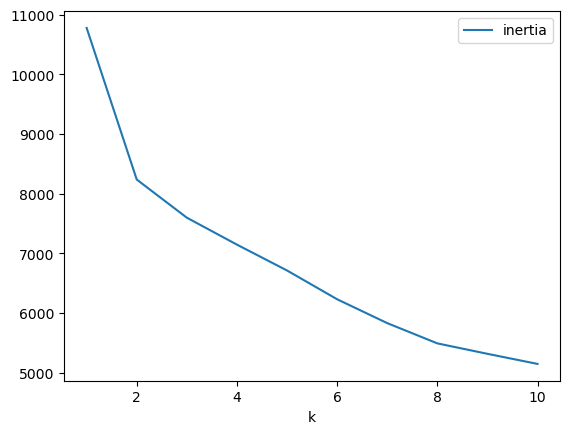

In [39]:
inertia = []
k = list(range(1,11))

for i in k:
    model = KMeans(n_clusters=i, n_init='auto', random_state=13)
    model.fit(scaled_df)
    inertia.append(model.inertia_)

elbow_data = {'k': k, 'inertia': inertia}
elbow_df = pd.DataFrame(elbow_data)

elbow_df.plot.line(x='k', y='inertia')

In [40]:
pca = PCA(n_components=2, random_state=13)
X_pca = pca.fit_transform(X)
X_pca[:5]

array([[ 2.50446712, -0.44989984],
       [ 4.7940323 , -0.0229004 ],
       [-2.42098588, -0.45932419],
       [-1.51314965,  0.38009947],
       [-0.0577123 , -0.25924925]])

In [41]:
kmeans = KMeans(n_clusters=2, random_state=13)
kmeans.fit(X_pca)
cluster = kmeans.predict(X_pca)

In [42]:
X_pca_df = pd.DataFrame(X_pca)
X_pca_df['cluster'] = cluster
X_pca_df.head()


,0,1,cluster
0,2.504467,-0.449900,0
1,4.794032,-0.022900,0
2,-2.420986,-0.459324,1
3,-1.513150,0.380099,1
4,-0.057712,-0.259249,1


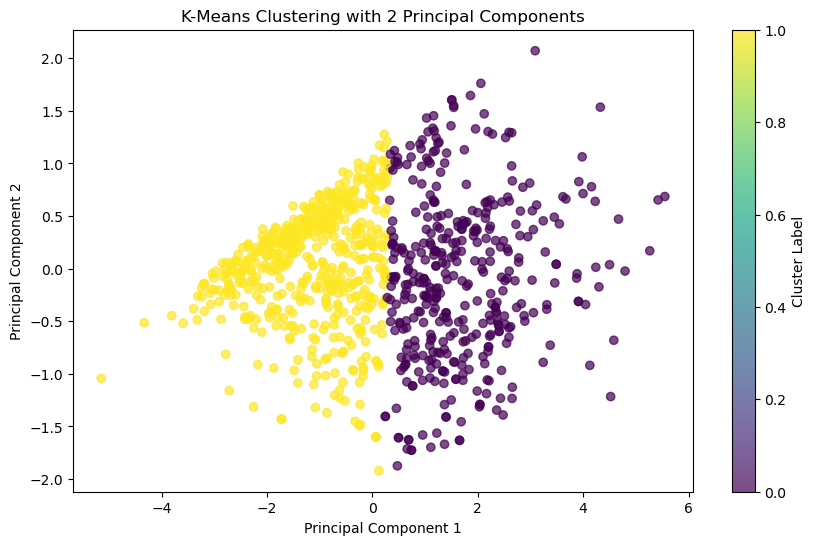

In [43]:
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster, cmap='viridis', alpha=0.7)
plt.colorbar(label='Cluster Label')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering with 2 Principal Components')
plt.show()

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, random_state=13)

In [45]:
model = LogisticRegression(random_state=13)
model.fit(X_train, y_train)

LogisticRegression(random_state=13)

In [46]:
model.score(X_test, y_test)

0.9755102040816327

In [47]:
model.score(X_train, y_train)

0.9850340136054422

In [48]:
y_test_preds = model.predict(X_test)
balanced_accuracy_score(y_test, y_test_preds)

0.9754764760762362

In [49]:
print(f"Accuracy: {accuracy_score(y_test, y_test_preds)}")

Accuracy: 0.9755102040816327







Content-Based Filtering




In [52]:
new_df = df.copy()
new_df = new_df.drop(columns={'Total Rating', 'Average Rating', 'Above or Below Average Experience', 'Sum of Ratings'})
new_df = new_df.map(lambda x: 0 if x < 0.5 else x)
new_df.head(10)

,Art Galleries,Dance Clubs,Juice Bars,Restaurants,Museums,Resorts,Parks/Picnic Spots,Beaches,Theaters,Religious Institutions
0,0.93,1.80,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,1.02,2.20,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,1.22,0.80,0.54,0.53,0.00,1.54,3.18,2.80,1.31,2.50
3,0.00,1.80,0.00,0.57,0.00,1.52,3.18,2.96,1.57,2.86
4,0.51,1.20,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54
5,0.99,1.28,0.72,0.00,0.74,1.26,3.17,2.89,1.66,3.66
6,0.90,1.36,0.00,0.00,0.86,1.58,3.17,2.66,1.22,3.22
7,0.74,1.40,0.00,0.00,0.82,1.50,3.17,2.81,1.54,2.88
8,1.12,1.76,1.04,0.64,0.82,2.14,3.18,2.79,1.41,2.54
9,0.70,1.36,0.00,0.00,1.50,1.54,3.17,2.82,2.24,3.12


Top Recommendations for User 7 Based on Content-Based Filtering
Dance Clubs      0.939722
Dance Clubs      0.935884
Dance Clubs      0.931192
Art Galleries    0.923945
Art Galleries    0.923008
dtype: float64


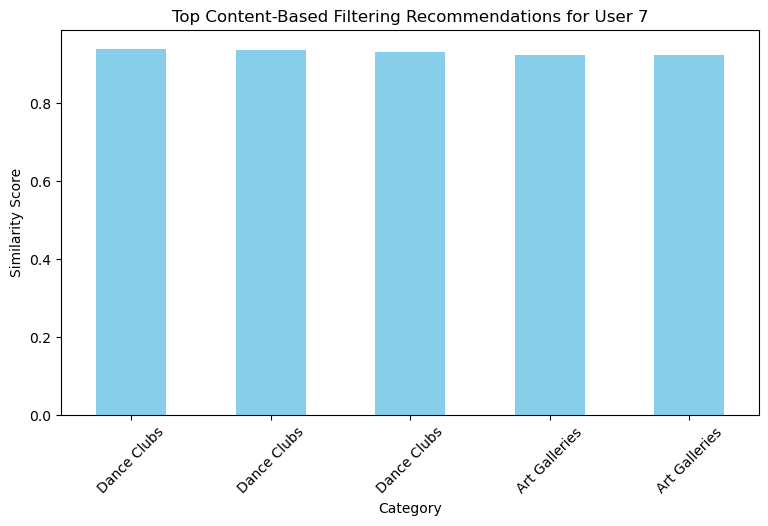

In [53]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(new_df.T)

cosine_sim_df = pd.DataFrame(cosine_sim, index=features, columns=features)

user_index = 7
user_ratings = new_df.iloc[user_index]

high_ratings = user_ratings[user_ratings > user_ratings.mean()]

recommendations = pd.Series(dtype=float)

for category in high_ratings.index:
    recommendations = pd.concat([recommendations, cosine_sim_df[category]])

recommendations = recommendations.drop(labels=high_ratings.index)

top_recommendations =  recommendations.sort_values(ascending=False).head(5)

print(f"Top Recommendations for User {user_index} Based on Content-Based Filtering")
print(top_recommendations)

plt.figure(figsize=(9, 5))
top_recommendations.plot(kind='bar', color='skyblue')
plt.title(f"Top Content-Based Filtering Recommendations for User {user_index}")
plt.xlabel('Category')
plt.ylabel('Similarity Score')
plt.xticks(rotation=45)
plt.show()